You are given an integer n, which indicates that there are n courses labeled from 1 to n. You are also given a 2D integer array relations where relations[j] = [prevCoursej, nextCoursej] denotes that course prevCoursej has to be completed before course nextCoursej (prerequisite relationship). Furthermore, you are given a 0-indexed integer array time where time[i] denotes how many months it takes to complete the (i+1)th course.

You must find the minimum number of months needed to complete all the courses following these rules:

    You may start taking a course at any time if the prerequisites are met.
    Any number of courses can be taken at the same time.

Return the minimum number of months needed to complete all the courses.

Note: The test cases are generated such that it is possible to complete every course (i.e., the graph is a directed acyclic graph).

 

Example 1:

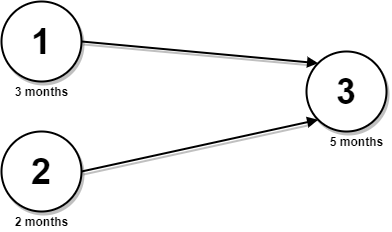

Input: n = 3, relations = [[1,3],[2,3]], time = [3,2,5]
Output: 8
Explanation: The figure above represents the given graph and the time required to complete each course. 
We start course 1 and course 2 simultaneously at month 0.
Course 1 takes 3 months and course 2 takes 2 months to complete respectively.
Thus, the earliest time we can start course 3 is at month 3, and the total time required is 3 + 5 = 8 months.

Example 2:

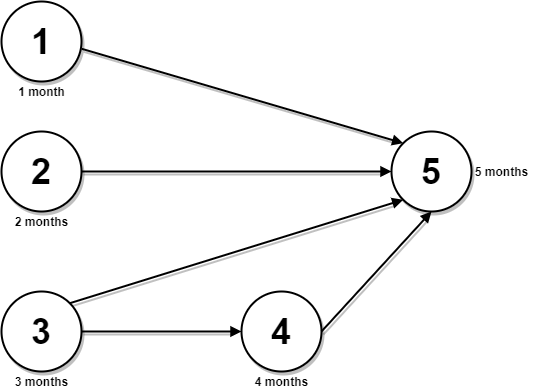

Input: n = 5, relations = [[1,5],[2,5],[3,5],[3,4],[4,5]], time = [1,2,3,4,5]
Output: 12
Explanation: The figure above represents the given graph and the time required to complete each course.
You can start courses 1, 2, and 3 at month 0.
You can complete them after 1, 2, and 3 months respectively.
Course 4 can be taken only after course 3 is completed, i.e., after 3 months. It is completed after 3 + 4 = 7 months.
Course 5 can be taken only after courses 1, 2, 3, and 4 have been completed, i.e., after max(1,2,3,7) = 7 months.
Thus, the minimum time needed to complete all the courses is 7 + 5 = 12 months.

 

Constraints:

    1 <= n <= 5 * 104
    0 <= relations.length <= min(n * (n - 1) / 2, 5 * 104)
    relations[j].length == 2
    1 <= prevCoursej, nextCoursej <= n
    prevCoursej != nextCoursej
    All the pairs [prevCoursej, nextCoursej] are unique.
    time.length == n
    1 <= time[i] <= 104
    The given graph is a directed acyclic graph.



In [ ]:
class Solution:
    def minimumTime(self, n: int, relations: List[List[int]], time: List[int]) -> int:
        graph = defaultdict(list)
        for i, j in relations:
            graph[i - 1].append(j - 1)

        @cache
        def dfs(node):
            if not graph[node]:
                return time[node]
            return max([dfs(n) for n in graph[node]]) + time[node]
        
        ans = 0
        for node in range(n):
            ans = max(ans, dfs(node))
        return ans